In [1]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
import networkx as nx
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.control_flow_graph import ControlFlowGraph



[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3e20
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


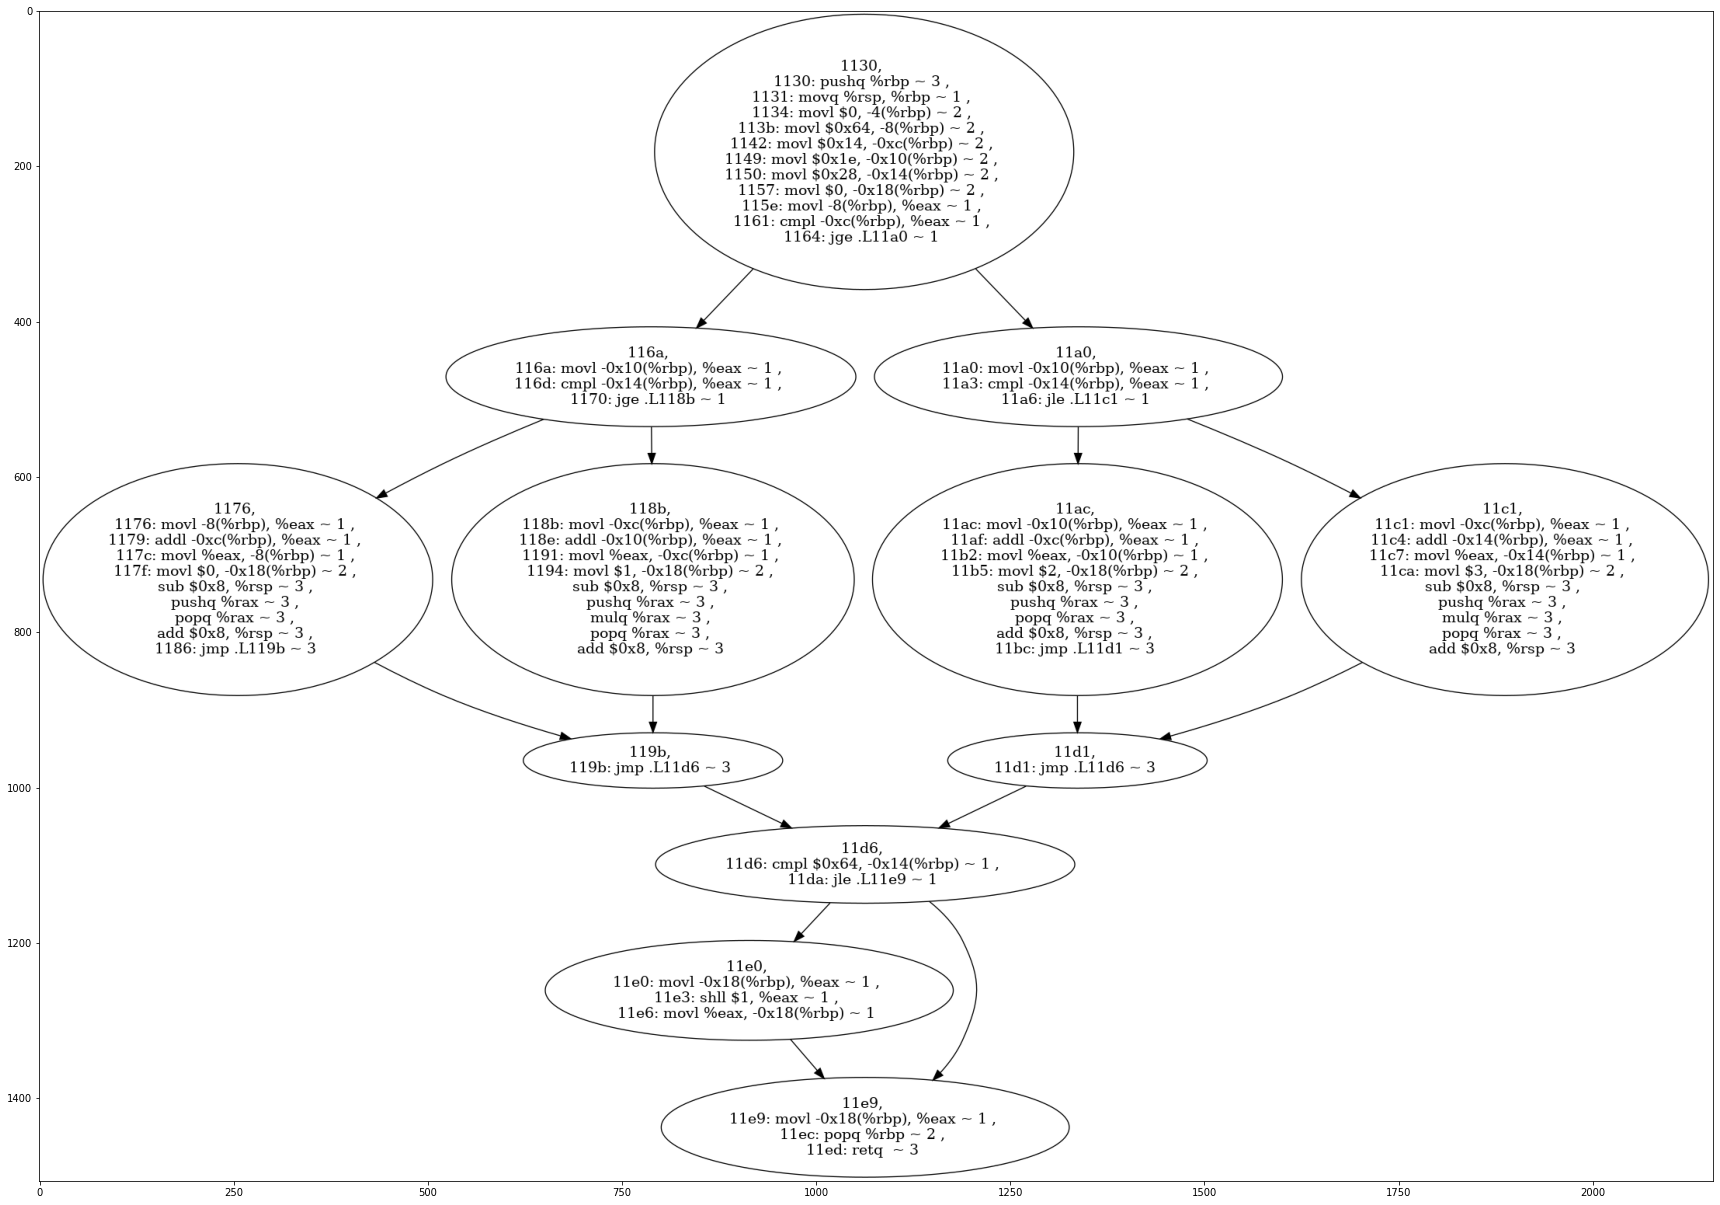

In [2]:
from rwtools.nemesis.graph.utils import create_graph_structure
from rwtools.nemesis.graph.utils import to_img
from rwtools.nemesis.graph.balance import balance_branching_point

from test_main import setup 

binary = os.path.abspath("../samples_notebooks/stopping_condition/stopping_condition")
outputfile = "../samples_notebooks/stopping_condition/stopping_condition.s"
loader, rw = setup(binary, outputfile)

function_names = loader.container.function_names
nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(1, figsize=(30, 30))


control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)

control_flow_graph.merge_consecutive_nodes()
# axs[0].imshow(to_img(graph))

# control_flow_graph.unwind_graph()

control_flow_graph.insert_nodes()
# axs[0].imshow(to_img(graph))
target_node = control_flow_graph.get_node('1130')

control_flow_graph.set_stopping_nodes(target_node)
balance_branching_point(control_flow_graph, target_node)

control_flow_graph.merge_inserted_nodes()

axs.imshow(to_img(graph))

rw.dump()
    

In [3]:
def is_balanced(cfg, node): 
    succ = list(cfg.get_successors(node))
    if len(succ) == 0: 
        return True # leaf 
    elif len(succ) == 1: 
        if cfg.is_stopping_node(succ[0]): 
            return True
        else:
            return is_balanced(cfg, succ[0])
    else: 
        # node is balanced if both of its successors are 
        # balanced and if the roots of the node have the same set of latencies
        print(f"{succ[0].id} is balanced: {is_balanced(cfg, succ[0])}")
        print(f"{succ[1].id} is balanced: {is_balanced(cfg, succ[1])}")
        print(f"equal latencies: {succ[0].get_latencies() == succ[1].get_latencies()}")
        print(succ[0].get_latencies())
        print(succ[1].get_latencies())
        return is_balanced(cfg, succ[0]) and is_balanced(cfg, succ[1]) and succ[0].get_latencies() == succ[1].get_latencies()
        return True 
    
    
target_node = control_flow_graph.get_node('1130')
control_flow_graph.set_stopping_nodes(target_node)


is_balanced(control_flow_graph, target_node)

1176 is balanced: True
118b is balanced: True
equal latencies: True
[1, 1, 1, 2, 3, 3, 3, 3, 3]
[1, 1, 1, 2, 3, 3, 3, 3, 3]
116a is balanced: True
11ac is balanced: True
11c1 is balanced: True
equal latencies: True
[1, 1, 1, 2, 3, 3, 3, 3, 3]
[1, 1, 1, 2, 3, 3, 3, 3, 3]
11a0 is balanced: True
equal latencies: True
[1, 1, 1]
[1, 1, 1]
1176 is balanced: True
118b is balanced: True
equal latencies: True
[1, 1, 1, 2, 3, 3, 3, 3, 3]
[1, 1, 1, 2, 3, 3, 3, 3, 3]
11ac is balanced: True
11c1 is balanced: True
equal latencies: True
[1, 1, 1, 2, 3, 3, 3, 3, 3]
[1, 1, 1, 2, 3, 3, 3, 3, 3]


True

# Evaluate if a given node is balanced or not 
A node is balanced if all of its descendants are balanced 


[*] Relocations for a section that's not loaded: .rela.dyn
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


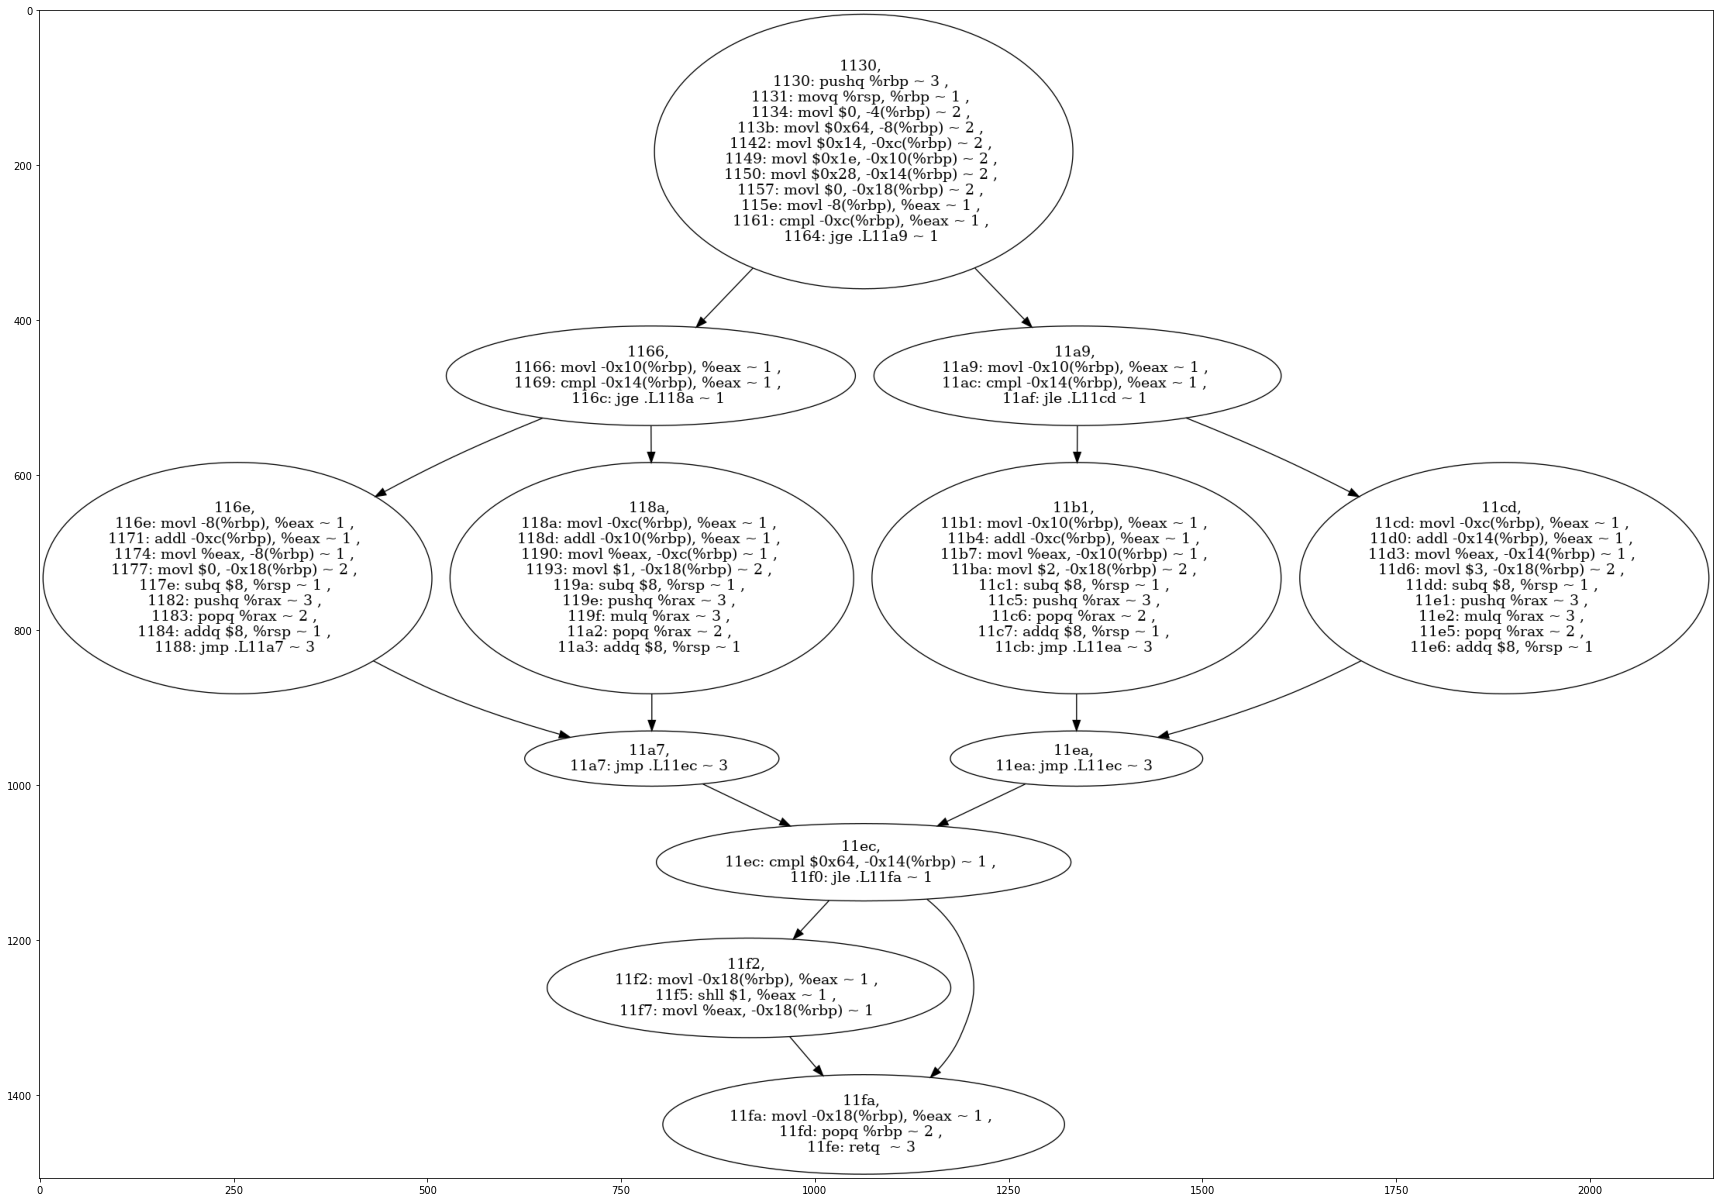

In [4]:

binary = os.path.abspath("../samples_notebooks/stopping_condition/a.out")
outputfile = "../samples_notebooks/stopping_condition/stopping_condition.s"
loader, rw = setup(binary, outputfile)

function_names = loader.container.function_names
nodes, graph = create_graph_structure(loader.container, "main")
fig, axs = plt.subplots(1, figsize=(30, 30))


control_flow_graph = ControlFlowGraph(nodes=nodes, graph=graph)
control_flow_graph.merge_consecutive_nodes()
axs.imshow(control_flow_graph.to_img())

target_node = control_flow_graph.get_node("1130")

In [5]:
def is_balanced(cfg, node): 
    succ = list(cfg.get_successors(node))
    if len(succ) == 0: 
        return True # leaf 
    elif len(succ) == 1: 
        if cfg.is_stopping_node(succ[0]): 
            return True
        else:
            return is_balanced(cfg, succ[0])
    else: 
        # node is balanced if both of its successors are 
        # balanced and if the roots of the node have the same set of latencies
        print(f"{succ[0].id} is balanced: {is_balanced(cfg, succ[0])}")
        print(f"{succ[1].id} is balanced: {is_balanced(cfg, succ[1])}")
        print(f"equal latencies: {succ[0].get_latencies() == succ[1].get_latencies()}")
        print(succ[0].get_latencies())
        print(succ[1].get_latencies())
        return is_balanced(cfg, succ[0]) and is_balanced(cfg, succ[1]) and succ[0].get_latencies() == succ[1].get_latencies()
        return True 
    

target_node = control_flow_graph.get_node('11a9')
control_flow_graph.set_stopping_nodes(target_node)


is_balanced(control_flow_graph, target_node)



11b1 is balanced: True
11cd is balanced: True
equal latencies: False
[1, 1, 1, 2, 1, 3, 2, 1, 3]
[1, 1, 1, 2, 1, 3, 3, 2, 1]


False